In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../code/")
from utils import *

In [2]:
parcellations_df = get_atlas_mapping()
parcellations_df

index  ROI Label                        ROI Name   R   A   S Hemisphere  \
0        0          1              7Networks_LH_Vis_1 -32 -42 -20         LH   
1        1          2              7Networks_LH_Vis_2 -30 -32 -18         LH   
2        2          3              7Networks_LH_Vis_3 -36 -62 -16         LH   
3        3          4              7Networks_LH_Vis_4 -24 -54  -8         LH   
4        4          5              7Networks_LH_Vis_5 -24 -72 -10         LH   
..     ...        ...                             ...  ..  ..  ..        ...   
395    395        396  7Networks_RH_Default_pCunPCC_5   4 -64  32         RH   
396    396        397  7Networks_RH_Default_pCunPCC_6   6 -38  34         RH   
397    397        398  7Networks_RH_Default_pCunPCC_7   4 -20  36         RH   
398    398        399  7Networks_RH_Default_pCunPCC_8  10 -52  36         RH   
399    399        400  7Networks_RH_Default_pCunPCC_9   8 -50  44         RH   

    Network  
0        VN  
1        VN  
2        VN  
3        VN  
4        VN  
..      ...  
395     DMN  
396     DMN  
397     DMN  
398     DMN  
399     DMN  

[400 rows x 8 columns]

In [3]:
networks_ids_for_plot = reorder_network_ids_for_plots(get_network_ids_for_plots())
networks_ids_for_plot

{'VN_LH': array([ 0, 30], dtype=int64),
 'VN_RH': array([200, 229], dtype=int64),
 'SMN_LH': array([30, 67], dtype=int64),
 'SMN_RH': array([229, 269], dtype=int64),
 'DAN_LH': array([67, 90], dtype=int64),
 'DAN_RH': array([269, 292], dtype=int64),
 'VAN_LH': array([ 90, 112], dtype=int64),
 'VAN_RH': array([292, 317], dtype=int64),
 'LN_LH': array([112, 125], dtype=int64),
 'LN_RH': array([317, 330], dtype=int64),
 'FPN_LH': array([125, 147], dtype=int64),
 'FPN_RH': array([330, 360], dtype=int64),
 'DMN_LH': array([147, 199], dtype=int64),
 'DMN_RH': array([360, 399], dtype=int64)}

In [4]:
# test is filled with ints that increase from left to right, top to bottom
# test = np.zeros((400, 400))
# for i in range(400):
#     for j in range(400):
#         test[i, j] = i*400 + j*400
# test_reordered = move_networks_to_adjacent(test)
# sns.heatmap(test)
# plt.show()
# sns.heatmap(test_reordered)
# plt.show()

In [5]:
networks_ids_for_plot_remapped = make_networks_ids_contiguous(networks_ids_for_plot)

In [6]:
att_weights = np.squeeze(np.load("results/SelfAtt_best_reproduction_FINAL_attention_weights.npy"))
att_weights.shape
# shape is 760, 400, 400

(760, 400, 400)

In [7]:
att_weights = move_networks_to_adjacent(att_weights)

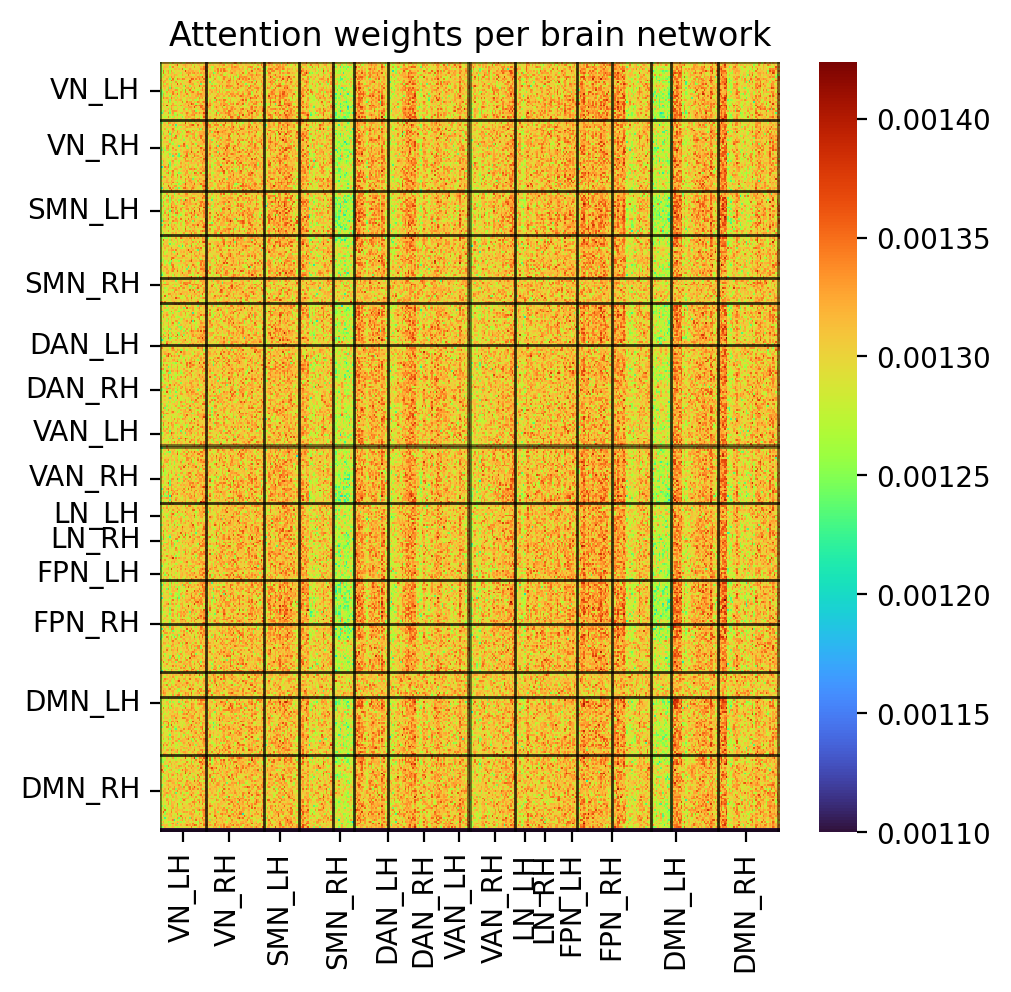

In [8]:
plt.figure(figsize=(5, 5), dpi=200)
sns.heatmap(att_weights.mean(axis=0), cmap="turbo", vmin=11e-4)
# add xticks in the middle of networks indicated by network_ids_for_plot
xticks = []
for k, v in networks_ids_for_plot_remapped.items():
    xticks.append(np.mean(v))
yticks = xticks
# add network name on the xticks
xticklabels = list(networks_ids_for_plot_remapped.keys())
yticklabels = xticklabels
# add vlines to separate networks
lw = 1
alpha = 0.5
for v in networks_ids_for_plot.values():
    plt.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[1], color="black", linewidth=lw, alpha=alpha)

plt.xticks(ticks=xticks, labels=xticklabels, rotation=90)
plt.yticks(ticks=yticks, labels=yticklabels, rotation=0)
plt.title("Attention weights per brain network")
plt.show()

Text(0.5, 1.0, 'Attention weights per brain network')

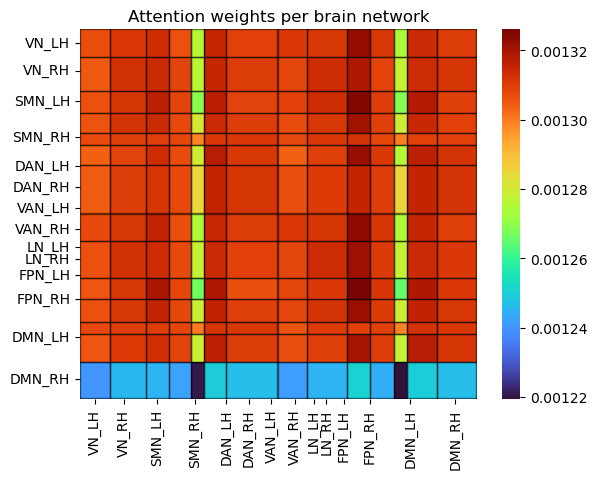

In [9]:
att_weights_mean = network_mean(att_weights.mean(axis=0))
        
sns.heatmap(att_weights_mean, cmap="turbo")
plt.xticks(ticks=xticks, labels=xticklabels, rotation=90)
plt.yticks(ticks=yticks, labels=yticklabels, rotation=0)
for v in networks_ids_for_plot.values():
    plt.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[1], color="black", linewidth=lw, alpha=alpha)

plt.title("Attention weights per brain network")

In [10]:
attributions = np.load("results/SelfAtt_best_reproduction_FINAL_attributions.npy")
    
attributions_cmap = "icefire"
# attributions_cmap = "vlag"

In [11]:
attributions.shape

(9, 24, 400, 400)

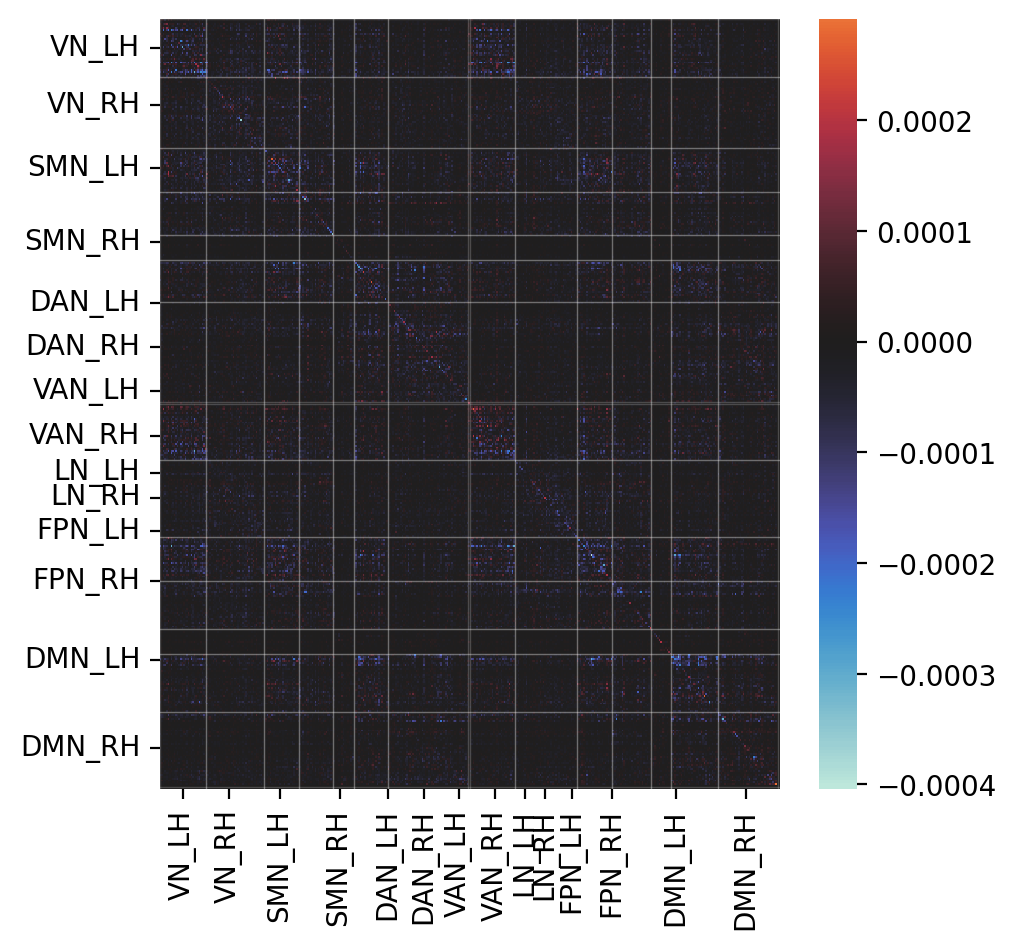

In [12]:
lw = 0.5
alpha = 0.2
plot = attributions[0]
plt.figure(figsize=(5, 5), dpi=200)
sns.heatmap(move_networks_to_adjacent(plot.mean(axis=0)), cmap=attributions_cmap, center=0)
plt.xticks(ticks=xticks, labels=xticklabels, rotation=90)
plt.yticks(ticks=yticks, labels=yticklabels, rotation=0)
for v in networks_ids_for_plot.values():
    plt.axvline(v[0], color="white", linewidth=lw, alpha=alpha)
    plt.axhline(v[0], color="white", linewidth=lw, alpha=alpha)
    plt.axvline(v[1], color="white", linewidth=lw, alpha=alpha)
    plt.axhline(v[1], color="white", linewidth=lw, alpha=alpha)


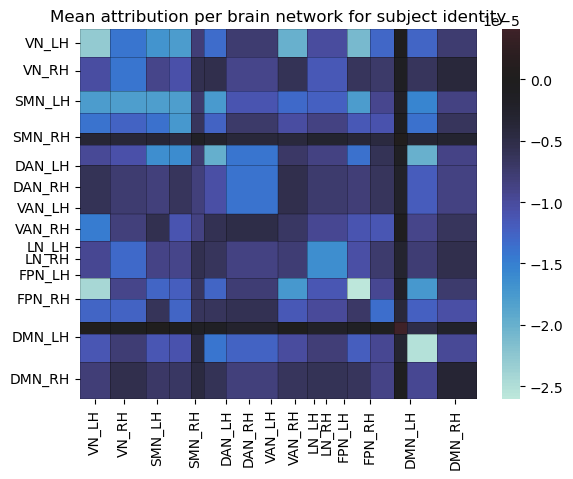

In [13]:
plot = move_networks_to_adjacent(attributions[0].mean(axis=0) )
plot = network_mean(plot)

sns.heatmap(plot, cmap=attributions_cmap, center=0)
plt.xticks(ticks=xticks, labels=xticklabels, rotation=90)
plt.yticks(ticks=yticks, labels=yticklabels, rotation=0)
for v in networks_ids_for_plot.values():
    plt.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[1], color="black", linewidth=lw, alpha=alpha)
plt.title("Mean attribution per brain network for subject identity")
plt.show()


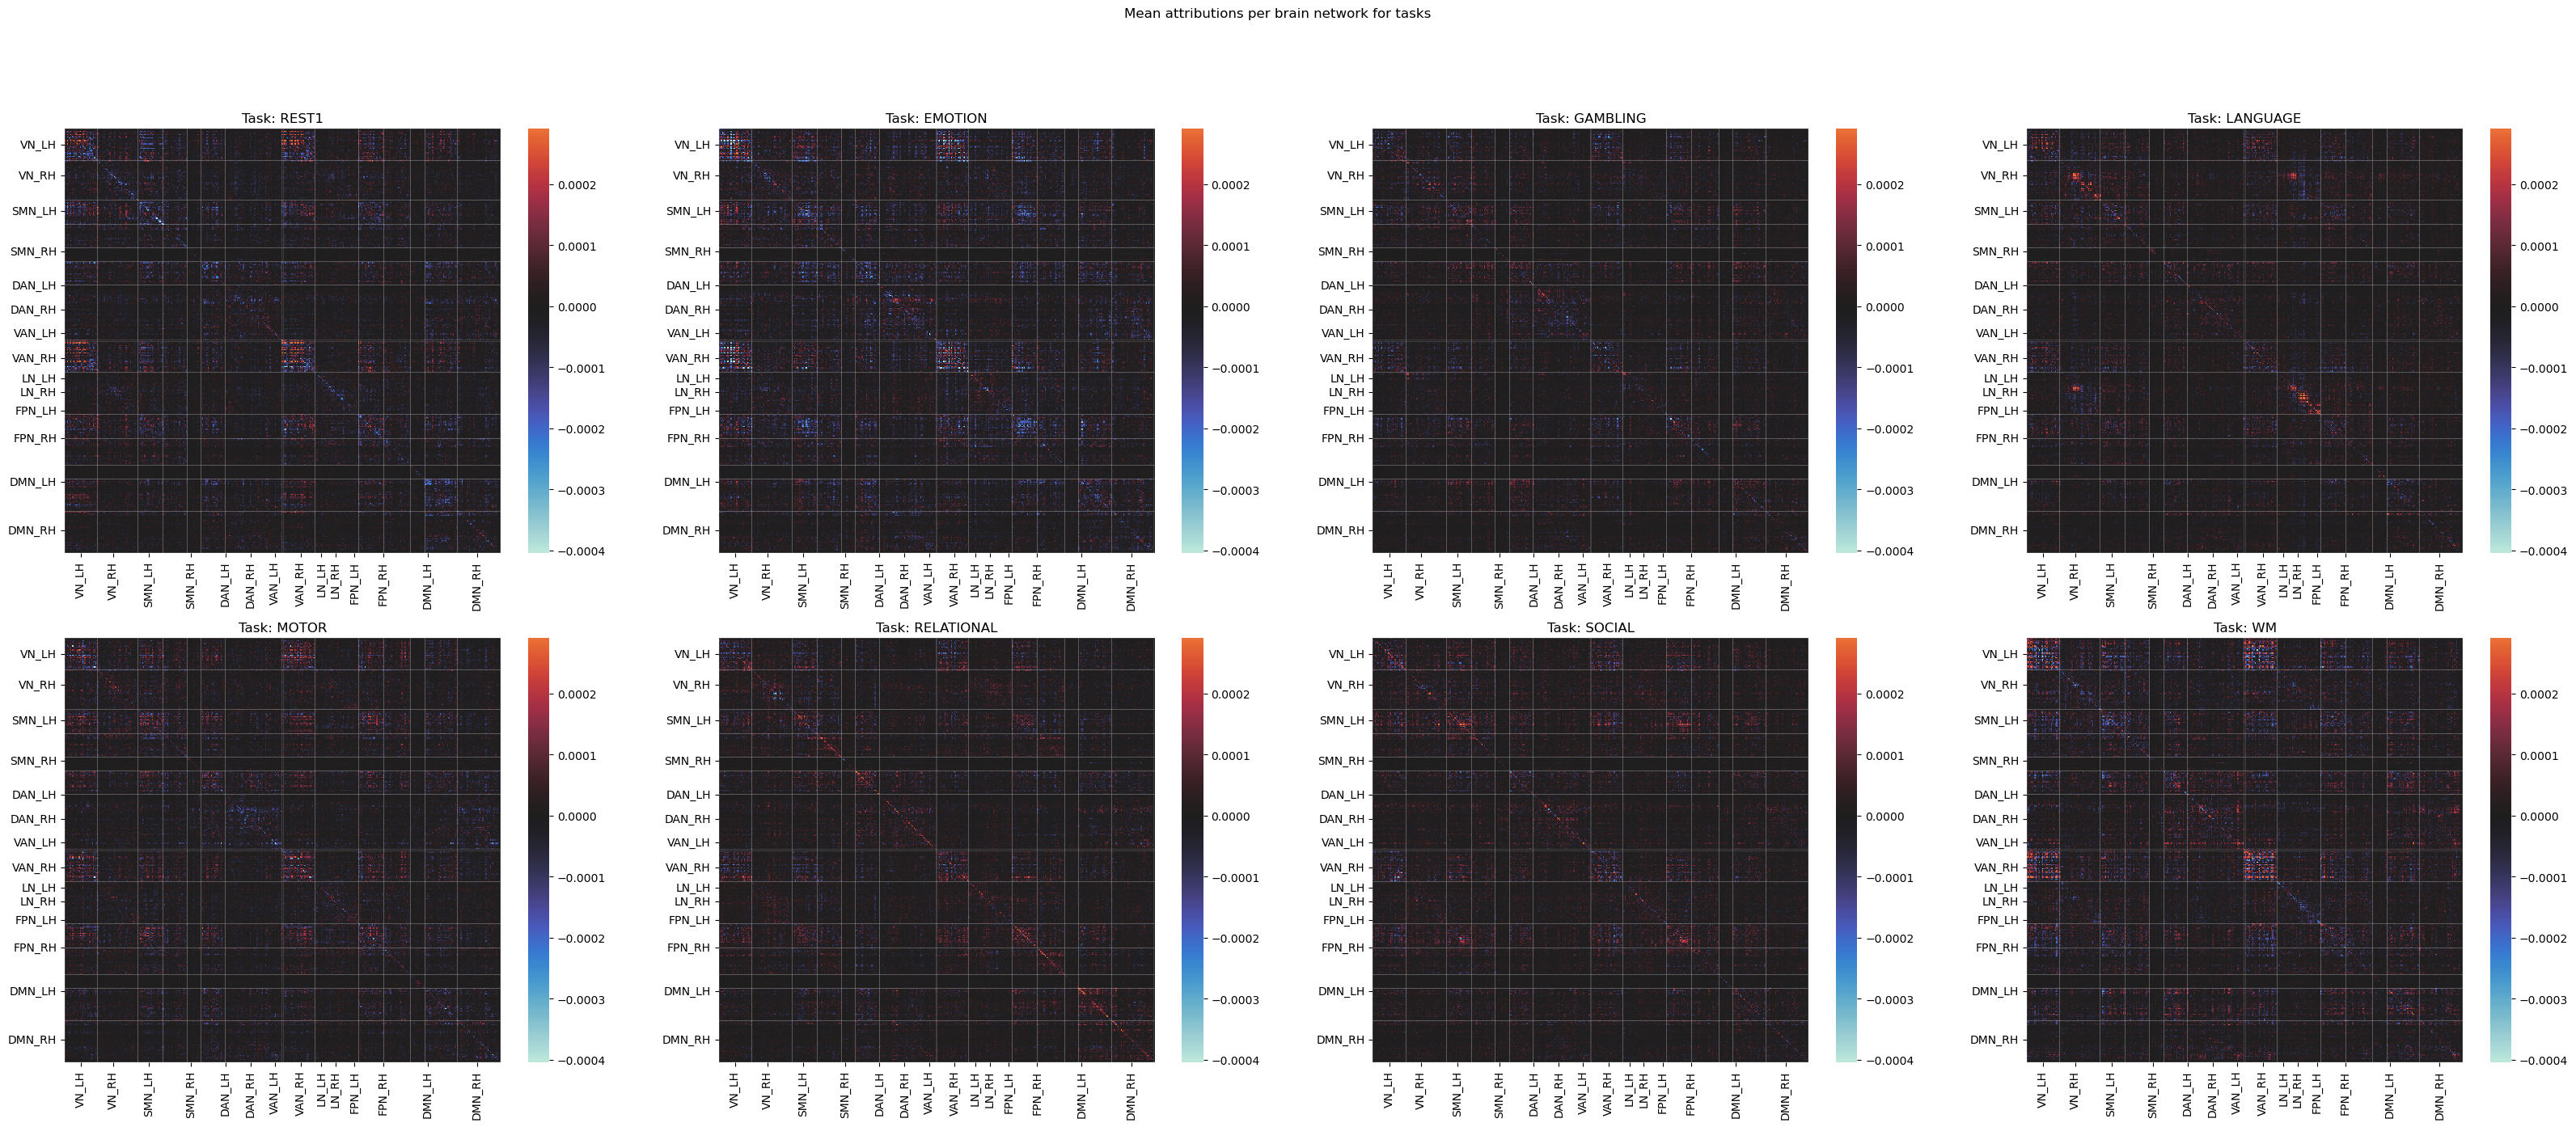

In [14]:
task_labels = [
            "REST1",
            "EMOTION",
            "GAMBLING",
            "LANGUAGE",
            "MOTOR",
            "RELATIONAL",
            "SOCIAL",
            "WM",
        ]
vmin = attributions[:1].mean(axis=1).min()
vmax = attributions[:1].mean(axis=1).max()
fig, axs = plt.subplots(2, 4, figsize=(40, 15), dpi=100)
for i, task in enumerate(task_labels):
    ax = axs.flatten()[i]
    sns.heatmap(move_networks_to_adjacent(attributions[i+1].mean(axis=0)), cmap=attributions_cmap, center=0,ax=ax, vmin=vmin, vmax=vmax)
    ax.set_xticks(ticks=xticks, labels=xticklabels, rotation=90)
    ax.set_yticks(ticks=yticks, labels=yticklabels, rotation=0)
    for v in networks_ids_for_plot.values():
        ax.axvline(v[0], color="white", linewidth=lw, alpha=alpha)
        ax.axhline(v[0], color="white", linewidth=lw, alpha=alpha)
        ax.axvline(v[1], color="white", linewidth=lw, alpha=alpha)
        ax.axhline(v[1], color="white", linewidth=lw, alpha=alpha)
    ax.set_title(f"Task: {task}")
plt.suptitle(f"Mean attributions per brain network for tasks")
plt.show()

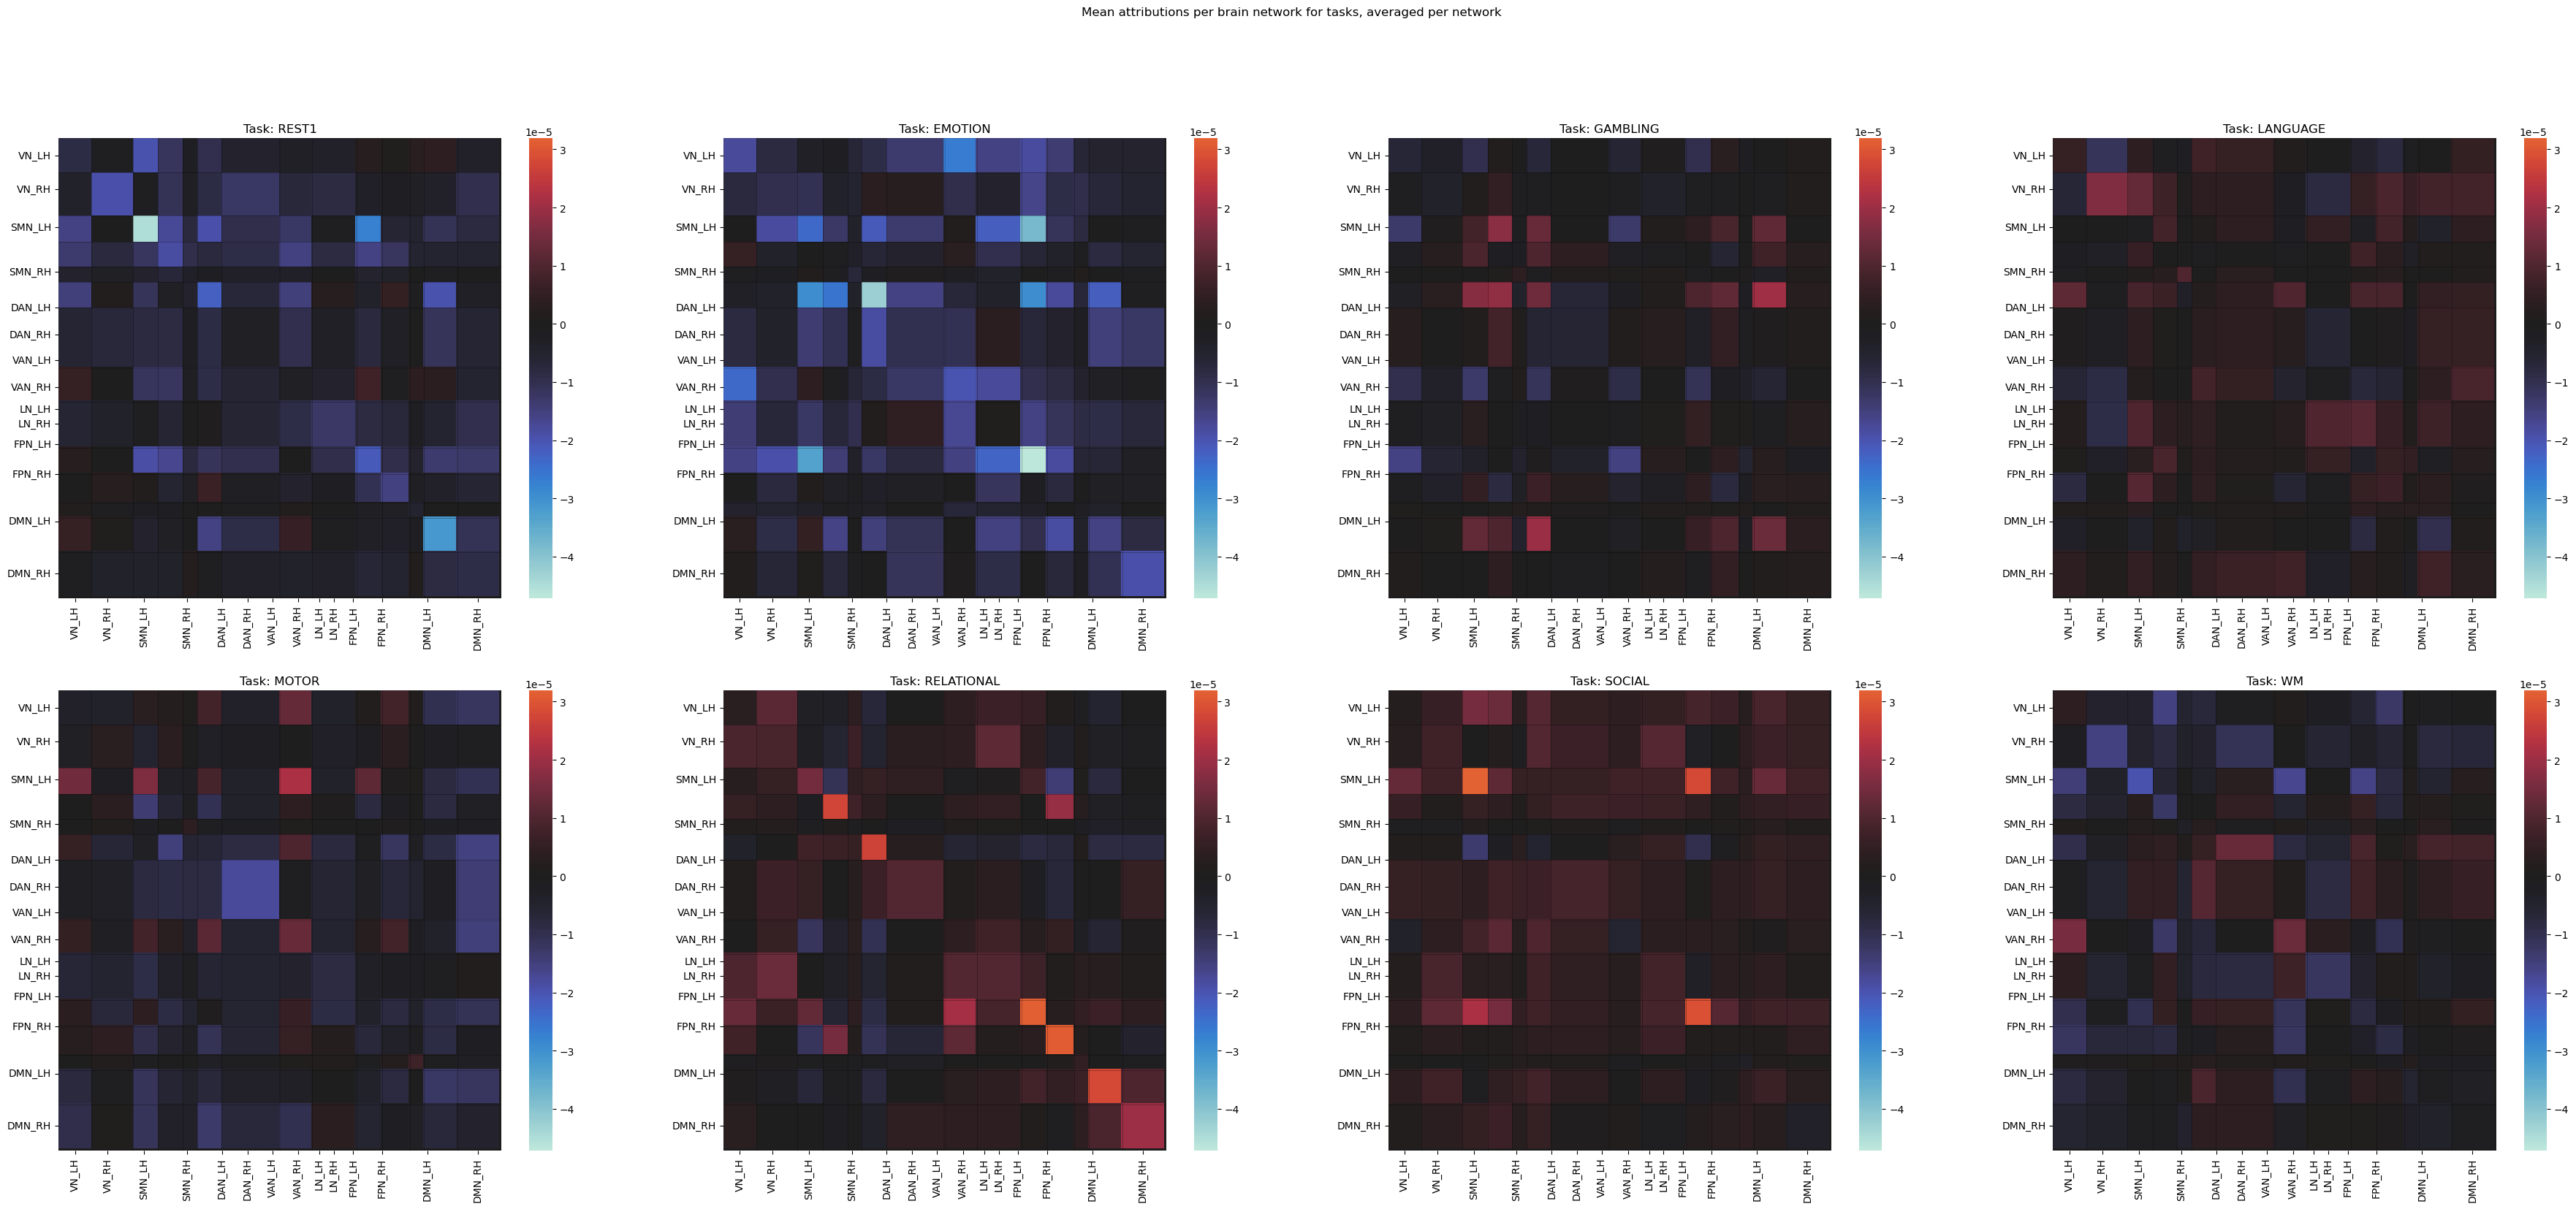

In [15]:
attributions_cmap = "icefire"
task_labels = [
            "REST1",
            "EMOTION",
            "GAMBLING",
            "LANGUAGE",
            "MOTOR",
            "RELATIONAL",
            "SOCIAL",
            "WM",
        ]
window_mean = np.array([network_mean(att.mean(axis=0)) for att in attributions[1:]])
vmin = window_mean.min()
vmax = window_mean.max()
fig, axs = plt.subplots(2, 4, figsize=(45, 18))
for i, task in enumerate(task_labels):
    ax = axs.flatten()[i]
    sns.heatmap(move_networks_to_adjacent(window_mean[i]), cmap=attributions_cmap, center=0,ax=ax, vmin=vmin, vmax=vmax)
    ax.set_xticks(ticks=xticks, labels=xticklabels, rotation=90)
    ax.set_yticks(ticks=yticks, labels=yticklabels, rotation=0)
    for v in networks_ids_for_plot.values():
        ax.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
        ax.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
        ax.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
        ax.axhline(v[1], color="black", linewidth=lw, alpha=alpha)
    ax.set_title(f"Task: {task}")
plt.suptitle(f"Mean attributions per brain network for tasks, averaged per network")
plt.show()

In [16]:
# subtract SI attributions from task attributions
# task_attributions = attributions[1:]
# subtraction = task_attributions - attributions[0]
# # plot subtractions
# fig, axs = plt.subplots(2, 4, figsize=(25, 10))
# for i, task in enumerate(task_labels):
#     ax = axs.flatten()[i]
#     window_mean = network_mean(subtraction[i].mean(axis=0))
#     sns.heatmap(window_mean, cmap=attributions_cmap, center=0,ax=ax)
#     ax.set_xticks(ticks=xticks, labels=xticklabels, rotation=0)
#     ax.set_yticks(ticks=yticks, labels=yticklabels, rotation=0)
#     for v in networks_ids_for_plot.values():
#         ax.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
#         ax.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
#         ax.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
#         ax.axhline(v[1], color="black", linewidth=lw, alpha=alpha)
#     ax.set_title(f"Task: {task}")

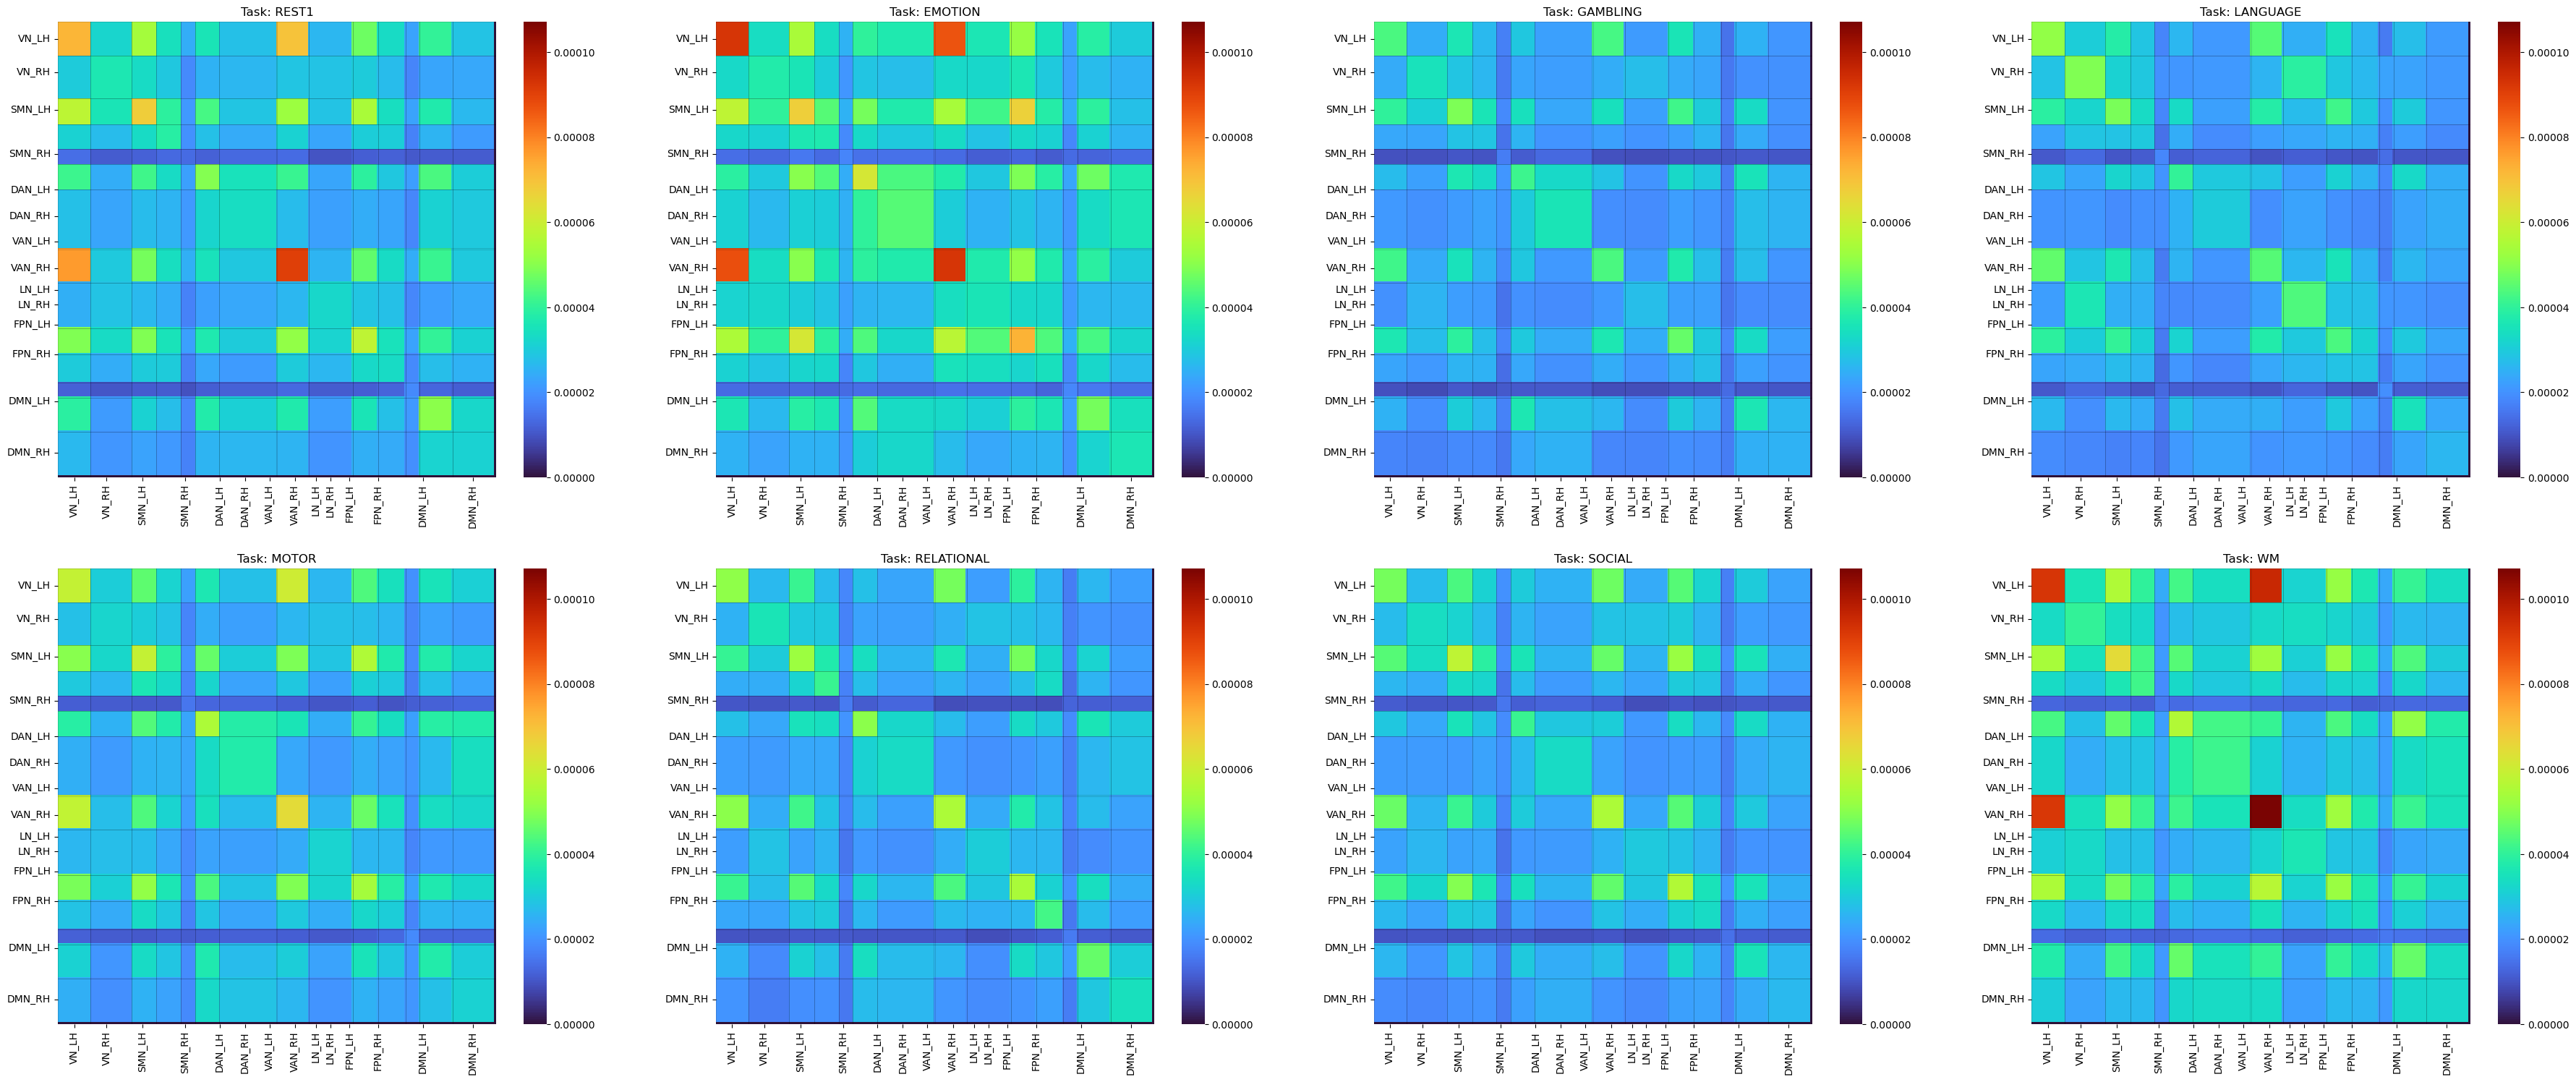

In [17]:
window_mean = np.array([network_mean(np.abs(att).mean(axis=0)) for att in attributions[1:]])
attributions_cmap = "turbo"

vmin = 0
vmax = window_mean.max()
fig, axs = plt.subplots(2, 4, figsize=(45, 18))
for i, task in enumerate(task_labels):
    ax = axs.flatten()[i]
    plot = move_networks_to_adjacent(window_mean[i])
    sns.heatmap(plot, cmap=attributions_cmap,ax=ax, vmin=vmin, vmax=vmax)
    ax.set_xticks(ticks=xticks, labels=xticklabels, rotation=90)
    ax.set_yticks(ticks=yticks, labels=yticklabels, rotation=0)
    for v in networks_ids_for_plot.values():
        ax.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
        ax.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
        ax.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
        ax.axhline(v[1], color="black", linewidth=lw, alpha=alpha)
    ax.set_title(f"Task: {task}")

In [21]:
# import sys
# sys.path.append("../code")
# from utils import save_interpretability_array_to_mat
# save_interpretability_array_to_mat(attributions, "results/SelfAtt_best_reproduction_attributions.mat")